In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [6]:
house_df = pd.read_csv('internship dataset.csv')

In [7]:
house_df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [8]:
house_df.shape

(414, 9)

In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


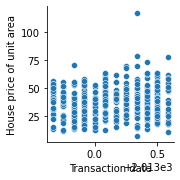

In [17]:
sns.pairplot(data=house_df,x_vars=["Transaction date"],y_vars=["House price of unit area"])

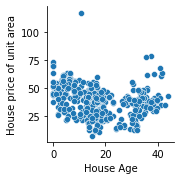

In [10]:
sns.pairplot(data=house_df,x_vars=["House Age"],y_vars=["House price of unit area"])

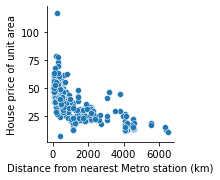

In [11]:
sns.pairplot(data=house_df,x_vars=["Distance from nearest Metro station (km)"],y_vars=["House price of unit area"])

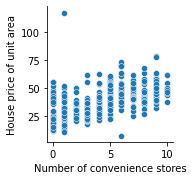

In [12]:
sns.pairplot(data=house_df,x_vars=["Number of convenience stores"],y_vars=["House price of unit area"])

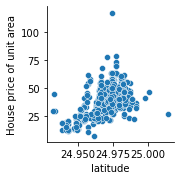

In [13]:
sns.pairplot(data=house_df,x_vars=["latitude"],y_vars=["House price of unit area"])

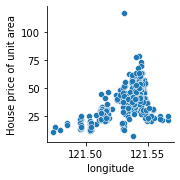

In [14]:
sns.pairplot(data=house_df,x_vars=["longitude"],y_vars=["House price of unit area"])

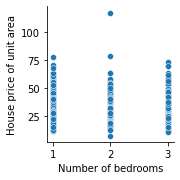

In [15]:
sns.pairplot(data=house_df,x_vars=["Number of bedrooms"],y_vars=["House price of unit area"])

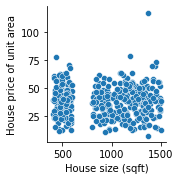

In [16]:
sns.pairplot(data=house_df,x_vars=["House size (sqft)"],y_vars=["House price of unit area"])

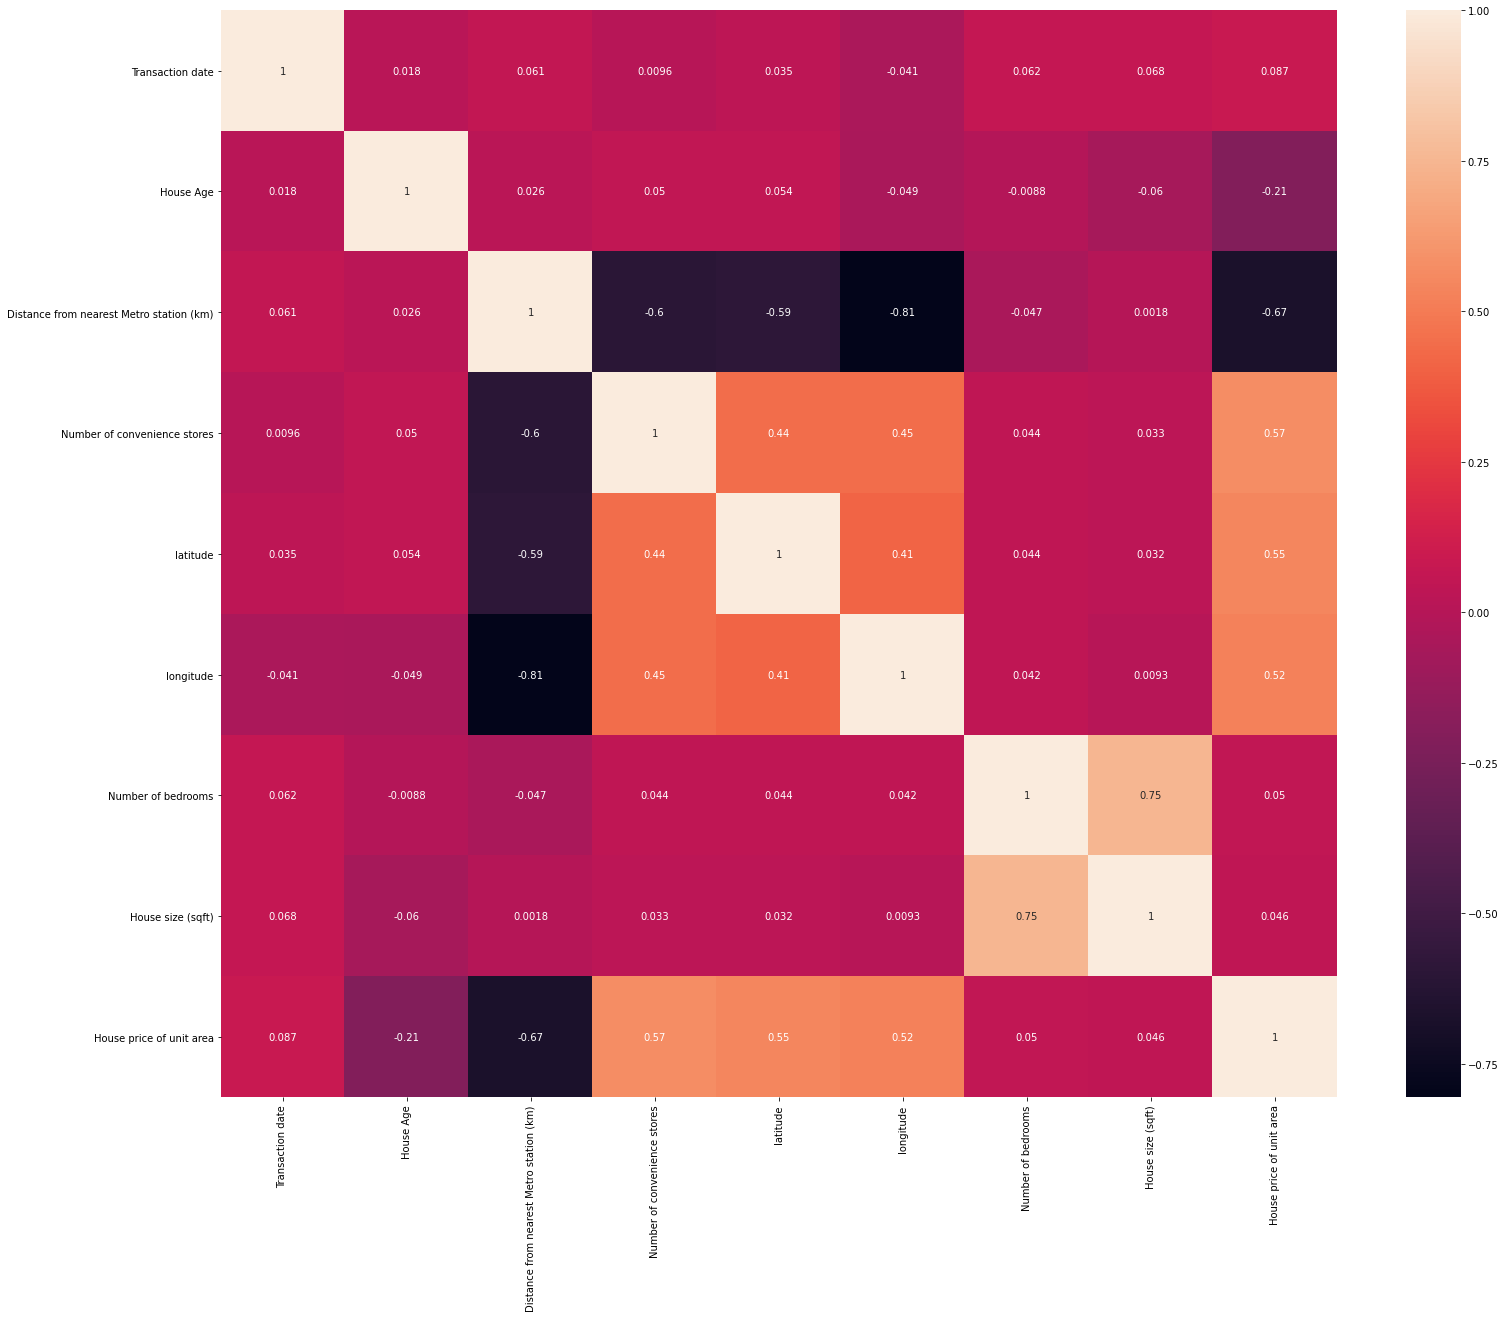

In [18]:
plt.figure(figsize = (25,20))
sns.heatmap(house_df.corr(),annot=True)
plt.show()

In [19]:
xtrain, xtest = train_test_split(house_df, train_size = 0.70, test_size = 0.30, random_state = 0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ["Transaction date","House Age","Distance from nearest Metro station (km)","Number of convenience stores","latitude","longitude","Number of bedrooms","House size (sqft)","House price of unit area"]

xtrain[num_vars] = scaler.fit_transform(xtrain[num_vars])

In [24]:
xtrain.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
294,0.909389,0.602740,0.048285,0.6,0.575982,0.731831,1.0,0.846715,0.253057
96,0.818777,0.146119,0.010375,0.9,0.512118,0.750162,1.0,0.689781,0.454374
377,0.727074,0.089041,0.004065,0.8,0.318589,0.690425,1.0,0.842153,0.428975
89,0.909389,0.525114,0.607081,0.0,0.190984,0.311624,0.0,0.062956,0.132643
233,0.727074,0.906393,0.047951,0.9,0.582768,0.709403,1.0,0.522810,0.199436


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ["Transaction date","House Age","Distance from nearest Metro station (km)","Number of convenience stores","latitude","longitude","Number of bedrooms","House size (sqft)","House price of unit area"]

xtest[num_vars] = scaler.fit_transform(xtest[num_vars])

In [27]:
xtest.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
356,0.181223,0.256858,0.024797,0.1,0.652270,0.601800,0.0,0.010120,0.533239
170,0.727074,0.598504,0.715431,0.0,0.117177,0.231808,0.5,0.965041,0.096181
224,0.727074,0.860349,0.042957,0.6,0.731654,0.730326,0.5,0.429623,0.543140
331,0.727074,0.638404,0.714151,0.0,0.134173,0.227308,0.0,0.011960,0.113154
306,0.909389,0.359102,0.018162,0.1,0.642671,0.599605,1.0,0.820607,0.602546


In [ ]:
##BUILDING A LINEAR MODEL
##Dividing into X and Y sets for the model building

In [29]:
X=xtrain.drop(["House price of unit area"],axis=1)
y=xtrain["House price of unit area"]

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
xtrain=sm.add_constant(xtrain)
model1=sm.OLS(ytrain,xtrain)
result1=model1.fit()

In [33]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.550
Model:                                  OLS   Adj. R-squared:                  0.531
Method:                       Least Squares   F-statistic:                     29.49
Date:                      Wed, 23 Nov 2022   Prob (F-statistic):           9.24e-30
Time:                              18:03:53   Log-Likelihood:                 200.38
No. Observations:                       202   AIC:                            -382.8
Df Residuals:                           193   BIC:                            -353.0
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2745      0.062      4.435      0.000       0.152       0.397
Transaction date                             0.0430      0.021      2.009      0.046       0.001       0.085
House Age                                   -0.1105      0.025     -4.441      0.000      -0.160      -0.061
Distance from nearest Metro station (km)    -0.3249      0.065     -5.012      0.000      -0.453      -0.197
Number of convenience stores                 0.0780      0.029      2.706      0.007       0.021       0.135
latitude                                     0.1685      0.049      3.404      0.001       0.071       0.266
longitude                                   -0.0681      0.065     -1.041      0.299      -0.197       0.061
Number of bedrooms                          -0.0150      0.024     -0.621      0.536      -0.063       0.033
House size (sqft)                            0.0148      0.031      0.470      0.639      -0.047       0.077
==============================================================================
Omnibus:                      147.828   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2147.668
Skew:                           2.589   Prob(JB):                         0.00
Kurtosis:                      18.111   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model2=sm.OLS(ytrain,xtrain)
result2=model2.fit()
result2.summary()

,Feature,VIF
0,const,91.822327
1,Transaction date,1.057015
2,House Age,1.036736
3,Distance from nearest Metro station (km),4.440273
4,Number of convenience stores,1.709651
5,latitude,1.570683
6,longitude,3.021324
7,Number of bedrooms,2.401503
8,House size (sqft),2.433038


In [35]:
xtrain=xtrain.drop(["House size (sqft)"],axis=1)

In [36]:
model2=sm.OLS(ytrain,xtrain)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.550
Model:                                  OLS   Adj. R-squared:                  0.533
Method:                       Least Squares   F-statistic:                     33.81
Date:                      Wed, 23 Nov 2022   Prob (F-statistic):           1.70e-30
Time:                              18:08:56   Log-Likelihood:                 200.27
No. Observations:                       202   AIC:                            -384.5
Df Residuals:                           194   BIC:                            -358.1
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2747      0.062      4.448      0.000       0.153       0.397
Transaction date                             0.0433      0.021      2.024      0.044       0.001       0.085
House Age                                   -0.1117      0.025     -4.524      0.000      -0.160      -0.063
Distance from nearest Metro station (km)    -0.3227      0.065     -5.001      0.000      -0.450      -0.195
Number of convenience stores                 0.0794      0.029      2.772      0.006       0.023       0.136
latitude                                     0.1701      0.049      3.451      0.001       0.073       0.267
longitude                                   -0.0658      0.065     -1.010      0.314      -0.194       0.063
Number of bedrooms                          -0.0064      0.016     -0.406      0.686      -0.037       0.025
==============================================================================
Omnibus:                      150.384   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2283.707
Skew:                           2.636   Prob(JB):                         0.00
Kurtosis:                      18.606   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,91.817944
1,Transaction date,1.056486
2,House Age,1.025456
3,Distance from nearest Metro station (km),4.417135
4,Number of convenience stores,1.693126
5,latitude,1.563233
6,longitude,3.003675
7,Number of bedrooms,1.020176


In [40]:
xtrain=xtrain.drop(["Number of bedrooms"],axis=1)

KeyError: "['Number of bedrooms'] not found in axis"

In [42]:
model3=sm.OLS(ytrain,xtrain)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.549
Model:                                  OLS   Adj. R-squared:                  0.535
Method:                       Least Squares   F-statistic:                     39.58
Date:                      Wed, 23 Nov 2022   Prob (F-statistic):           2.79e-31
Time:                              18:12:50   Log-Likelihood:                 200.18
No. Observations:                       202   AIC:                            -386.4
Df Residuals:                           195   BIC:                            -363.2
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2717      0.061      4.440      0.000       0.151       0.392
Transaction date                             0.0422      0.021      1.992      0.048       0.000       0.084
House Age                                   -0.1115      0.025     -4.527      0.000      -0.160      -0.063
Distance from nearest Metro station (km)    -0.3217      0.064     -5.001      0.000      -0.449      -0.195
Number of convenience stores                 0.0798      0.029      2.796      0.006       0.024       0.136
latitude                                     0.1699      0.049      3.456      0.001       0.073       0.267
longitude                                   -0.0657      0.065     -1.011      0.313      -0.194       0.062
==============================================================================
Omnibus:                      150.853   Durbin-Watson:                   1.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2294.571
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      18.639   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,90.517505
1,Transaction date,1.039315
2,House Age,1.025115
3,Distance from nearest Metro station (km),4.411406
4,Number of convenience stores,1.690468
5,latitude,1.563151
6,longitude,3.003648


In [44]:
xtrain=xtrain.drop(["longitude"],axis=1)

In [45]:
model4=sm.OLS(ytrain,xtrain)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     House price of unit area   R-squared:                       0.547
Model:                                  OLS   Adj. R-squared:                  0.535
Method:                       Least Squares   F-statistic:                     47.29
Date:                      Wed, 23 Nov 2022   Prob (F-statistic):           6.34e-32
Time:                              18:15:16   Log-Likelihood:                 199.65
No. Observations:                       202   AIC:                            -387.3
Df Residuals:                           196   BIC:                            -367.5
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2183      0.031      7.077      0.000       0.157       0.279
Transaction date                             0.0429      0.021      2.030      0.044       0.001       0.085
House Age                                   -0.1095      0.025     -4.460      0.000      -0.158      -0.061
Distance from nearest Metro station (km)    -0.2749      0.045     -6.157      0.000      -0.363      -0.187
Number of convenience stores                 0.0831      0.028      2.927      0.004       0.027       0.139
latitude                                     0.1713      0.049      3.486      0.001       0.074       0.268
==============================================================================
Omnibus:                      154.573   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2483.442
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      19.293   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=xtrain.columns

vif_data["VIF"]=[variance_inflation_factor(xtrain.values,i) for i in range(len(xtrain.columns))]
vif_data

,Feature,VIF
0,const,22.990782
1,Transaction date,1.038003
2,House Age,1.018409
3,Distance from nearest Metro station (km),2.124197
4,Number of convenience stores,1.669427
5,latitude,1.561874


In [ ]:
##so our final model will be

In [ ]:
##y=(22.990782)+(1.038003)*transaction age+(1.018409)*house age+(2.124197)*Distance from nearest Metro station (km)+(1.669427)*Number of convenience stores	+(1.561874)*latitude